# Esercitazione #10 - Fisica Computazionale

# **Metodo di Eulero**

Risolviamo alcuni esercizi numericamente. Il confronto con le soluzioni analitiche (quando possibile) è lasciato come esercizio.

Simulare: 

- un oscillatore armonico (massa + molla)

- ... in presenza di gravità

- ... e su un piano inclinato

- ... e con attrito viscoso

- ... ma solo su un tratto del piano, dalla posizione di equilibrio del blocco in giù.


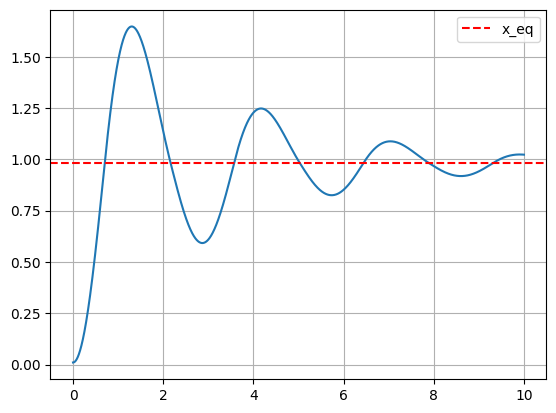

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0.01
k = 2
m = 0.4
dt = 0.001
b = .5
theta = np.pi/6
g = 9.81
mu_d = 0.01
x_eq = m*g*np.sin(theta)/k

t_max = 10                 # stabiliamo la durata dell'esperimento

ts = [0]
xs = [x0]
vels = [0]
accs = [-k*x0]

# Metodo di Eulero:
while ts[-1] < t_max:
    v = vels[-1] + accs[-1]*dt
    x = xs[-1] + v*dt

    # calcolo forza 
    F_hooke = -k*x
    F_gravita = m * g * np.sin(theta)
    if x < x_eq:
        F_viscoso = 0
    else:
        F_viscoso = -b*v
    F = F_hooke + F_viscoso + F_gravita 

    # Memorizziamo i risultati
    ts.append(ts[-1] + dt)
    xs.append(x)
    vels.append(v)
    accs.append(F/m)

plt.plot(ts,xs)
plt.axhline(x_eq, color='r', linestyle='--', label='x_eq')

plt.legend(loc=1)
plt.grid()



### Esercizio 35 pag. 212

Una slitta di massa $m$ riceve una spinta su uno stagno ghiacciato, che le dà una velocità iniziale di 2,00 m/s. Il coefficiente di attrito dinamico tra la slitta e il ghiaccio è 0,100. Utilizza il principio di conservazione dell'energia per determinare la distanza percorsa dalla slitta prima che si fermi.


Risolvi lo stesso esercizio utilizzando le formule della cinematica sui moti e confronta i risultati.

In [ ]:
# codice

## Soluzione numerica sistema eq. differenziali primo ordine - Decadimento radioattivo

$$ \frac{dN}{dt} = -\lambda N $$

In [ ]:
#  codice

## Soluzione numerica sistema eq. differenziali primo ordine - Preda e predatore

I metodi numerici come quello di Eulero possono essere utilizzati anche per risolvere equazioni differenziali al di fuori della dinamica di un corpo. Prendiamo come esempio il modello preda-predatore (o equazioni di Lotka-Volterra), un noto modello matematico che descrive appunto come cambiano nel tempo le popolazioni di una preda e di un predatore - diciamo conigli e volpi - che vivono in uno stesso ecosistema. 

Insomma il numero $C(t)$ di conigli e $V(t)$ di volpi dipendono l'uno dall'altro e variano in maniera non banale! Matematicamente il problema è descritto da questo sistema di equazioni differenziali ordinarie al primo ordine:
$$C'(t) = \alpha C(t) - \beta C(t) V(t)$$
$$V'(t) = -\gamma V(t) + \delta C(t) V(t)$$
dove $\alpha, \beta, \gamma, \delta$ sono coefficienti positivi. In sintesi:
- $\alpha$ è il tasso di crescita delle prede in assenza di predatori,
- $\beta$ rappresenta l'effetto negativo della presenza dei predatori sulla crescita delle prede,
- $\gamma$ è il tasso di mortalità dei predatori,
- $\delta$ rappresenta l'effetto positivo della presenza di prede sulla crescita dei predatori.

Consideriamo un numero iniziale di 1000 esemplari per entrambe le popolazioni e calcoliamone l'andamento nel tempo.


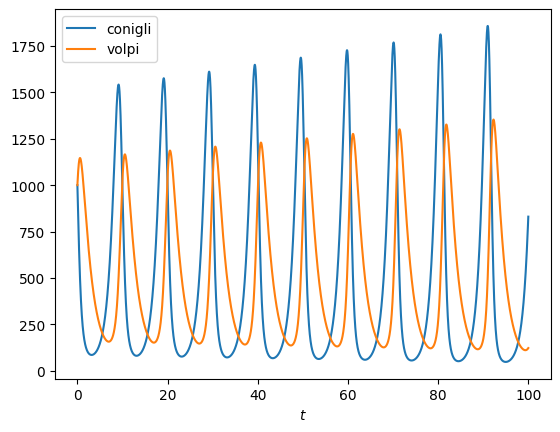

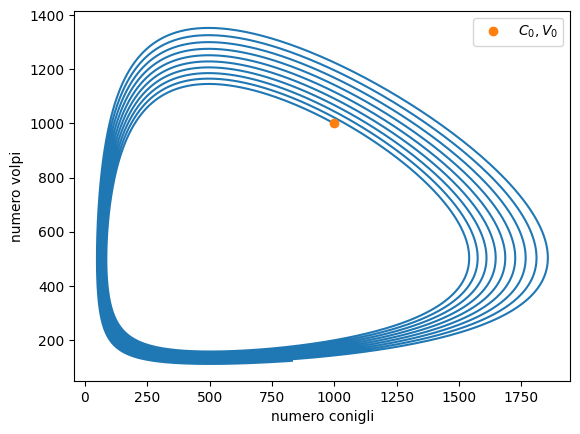

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

C0, V0 = 1000, 1000
alpha, beta, gamma, delta = 1., 0.002, 0.5, .001

ts = [0]
Cs = [C0]
Vs = [V0]
dt = 0.01

while ts[-1] < 100:
    C = Cs[-1] + (alpha * Cs[-1] - beta * Cs[-1] * Vs[-1]) * dt
    V = Vs[-1] + (-gamma * Vs[-1] + delta * Cs[-1] * Vs[-1]) * dt
    t = ts[-1] + dt

    Cs.append(C)
    Vs.append(V)
    ts.append(t)

plt.figure(1)
plt.plot(ts, Cs, label='conigli')
plt.plot(ts, Vs, label='volpi')
plt.xlabel('$t$')
plt.legend()

plt.figure(2)
plt.plot(Cs,Vs)
plt.plot(C0, V0, 'o', label='$C_0, V_0$')
plt.xlabel('numero conigli')
plt.ylabel('numero volpi')
plt.legend()